1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# 데이터 확인
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [1]:

from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [2]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [4]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
df['buying'] = label_encoder.fit_transform(df['buying'])
df['maint'] = label_encoder.fit_transform(df['maint'])
df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['safety'] = label_encoder.fit_transform(df['safety'])
df['doors'] = label_encoder.fit_transform(df['doors'])
df['persons'] = label_encoder.fit_transform(df['persons'])
df['class']=label_encoder.fit_transform(df['class'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


Text(0, 0.5, 'Count')

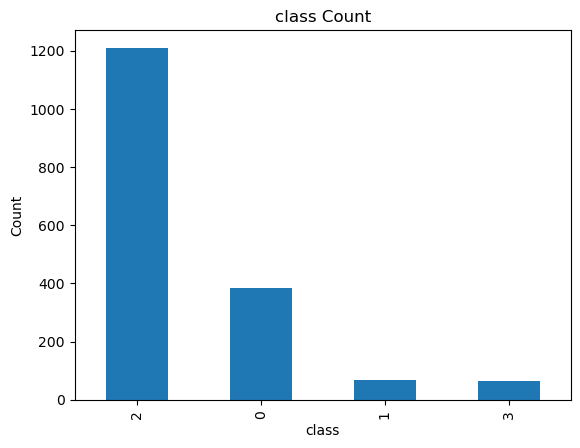

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['class'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('class Count')
plt.xlabel('class')
plt.ylabel('Count')

In [7]:

X=df.drop('class',axis=1)
y=df['class']

In [8]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [9]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

In [71]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list() 
    for i in range(len(sequences)):
        end_ix = i + n_steps 
        if end_ix > len(sequences):  
            break  
        seq_x = sequences[i:end_ix, :-1] 
        seq_y_values = sequences[i:end_ix, -1]  
        
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  
        y.append(most_common_label)  
    
    return np.array(X), np.array(y)  

In [72]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test]

In [73]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(1294, 3, 6) (1294,)
(430, 3, 6) (430,)


In [74]:
from keras.utils import to_categorical


y_train_seq = to_categorical(y_train_seq)  
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq) 
print(y_test_seq.shape)

(1294, 4)
(430, 4)


In [75]:

n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 6 4


In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [77]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features), return_sequences=True)) 
model.add(LSTM(units=128)) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

C:\Users\toxh1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 3, 128)              │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,684 (889.39 KB)

 Trainable params: 227,684 (889.39 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history = model.fit(X_train_seq, y_train_seq, epochs = 30, batch_size = 256, validation_split = 0.1, shuffle = True)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5121 - loss: 1.3600 - val_accuracy: 0.8385 - val_loss: 1.1925
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8219 - loss: 1.1200 - val_accuracy: 0.8385 - val_loss: 0.7457
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8241 - loss: 0.7175 - val_accuracy: 0.8385 - val_loss: 0.5567
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8286 - loss: 0.6882 - val_accuracy: 0.8385 - val_loss: 0.5124
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8283 - loss: 0.6054 - val_accuracy: 0.8385 - val_loss: 0.5333
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8226 - loss: 0.6159 - val_accuracy: 0.8385 - val_loss: 0.5306
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8264 - loss: 0.5914 - val_accuracy: 0.8385 - val_loss: 0.4779
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8240 - loss: 0.5801 - val_accuracy: 0.8385 - val_loss: 0.4685

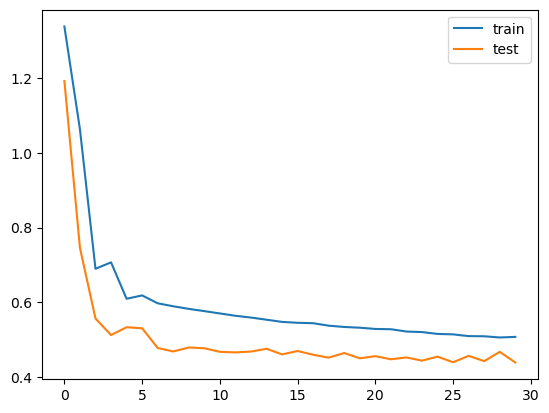

In [84]:

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [85]:

model.evaluate(X_train_seq, y_train_seq)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.5533


[0.49697360396385193, 0.8245749473571777]

In [86]:

model.evaluate(X_test_seq, y_test_seq)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7694 - loss: 0.6570


[0.6051919460296631, 0.7930232286453247]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix


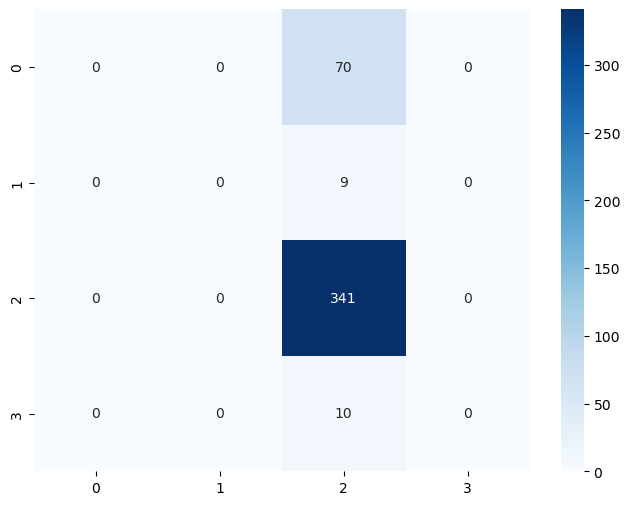

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()